In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import CM4Xutils
CM4Xutils.__version__

'0.8.0'

In [3]:
import warnings
import dask
import xarray as xr
import matplotlib.pyplot as plt

import doralite
import gfdl_utils.core as gu

### Load, regrid, and coarsen transient tracers

In [4]:
import sys
sys.path.insert(1, '../scipts')
from scripts.remap_functions import remap_tracers_to_sigma2_and_coarsen

In [5]:
ds = remap_tracers_to_sigma2_and_coarsen("CM4Xp125", "ssp585", "2020")
display(ds)

Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Inferring Z grid coordinate: density `sigma2`
Issuing dmget command to migrate data to disk. Migration complete.
Inferring Z grid coordinate: density `sigma2`


<xarray.Dataset> Size: 8GB
Dimensions:    (time: 60, yh: 224, xh: 240, sigma2_l: 76, xq: 241, yq: 225,
                sigma2_i: 77)
Coordinates: (12/26)
  * time       (time) object 480B 2020-01-16 12:00:00 ... 2024-12-16 12:00:00
  * yh         (yh) int64 2kB 0 1 2 3 4 5 6 7 ... 217 218 219 220 221 222 223
  * xh         (xh) int64 2kB 0 1 2 3 4 5 6 7 ... 233 234 235 236 237 238 239
  * sigma2_l   (sigma2_l) float64 608B -503.0 4.246 13.57 ... 37.9 38.49 539.0
  * xq         (xq) int64 2kB 0 1 2 3 4 5 6 7 ... 234 235 236 237 238 239 240
  * yq         (yq) int64 2kB 0 1 2 3 4 5 6 7 ... 218 219 220 221 222 223 224
    ...         ...
    geolat_c   (yq, xq) float64 434kB dask.array<chunksize=(225, 241), meta=np.ndarray>
    geolon_u   (yh, xq) float64 432kB dask.array<chunksize=(224, 241), meta=np.ndarray>
    geolat_u   (yh, xq) float64 432kB dask.array<chunksize=(224, 241), meta=np.ndarray>
    geolon_v   (yq, xh) float64 432kB dask.array<chunksize=(225, 240), meta=np.ndarray>
    geolat_v   (yq, xh) float64 432kB dask.array<chunksize=(225, 240), meta=np.ndarray>
    rho2_i     (sigma2_i) float64 616B dask.array<chunksize=(77,), meta=np.ndarray>
Data variables:
    thkcello   (time, sigma2_l, yh, xh) float32 981MB dask.array<chunksize=(1, 76, 224, 240), meta=np.ndarray>
    cfc11      (time, sigma2_l, yh, xh) float32 981MB dask.array<chunksize=(1, 76, 224, 240), meta=np.ndarray>
    cfc12      (time, sigma2_l, yh, xh) float32 981MB dask.array<chunksize=(1, 76, 224, 240), meta=np.ndarray>
    sf6        (time, sigma2_l, yh, xh) float32 981MB dask.array<chunksize=(1, 76, 224, 240), meta=np.ndarray>
    thetao     (time, sigma2_l, yh, xh) float32 981MB dask.array<chunksize=(1, 76, 224, 240), meta=np.ndarray>
    so         (time, sigma2_l, yh, xh) float32 981MB dask.array<chunksize=(1, 76, 224, 240), meta=np.ndarray>
    agessc     (time, sigma2_l, yh, xh) float64 2GB dask.array<chunksize=(1, 76, 224, 240), meta=np.ndarray>
Attributes:
    filename:            ocean_inert_z.202001-202412.cfc11.nc
    title:               CM4_ssp585_c192_OM4p125
    associated_files:    areacello: 20200101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  volcello areacello
    provenance:          Diagnostics have been conservatively remapped into m...

/work/hfd/.conda/envs/CM4Xutils/lib/python3.11/site-packages/dask/_task_spec.py:759: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/work/hfd/.conda/envs/CM4Xutils/lib/python3.11/site-packages/dask/_task_spec.py:759: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/work/hfd/.conda/envs/CM4Xutils/lib/python3.11/site-packages/dask/_task_spec.py:759: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/work/hfd/.conda/envs/CM4Xutils/lib/python3.11/site-packages/dask/_task_spec.py:759: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/work/hfd/.conda/envs/CM4Xutils/lib/python3.11/site-packages/dask/_task_spec.py:759: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/work/hfd/.conda/envs/CM4Xutils/lib/python3.11/site-packages/dask/_task_spec.py:759: RuntimeWarning: invalid value encountered in divide
  return self

### Plot some sections and isopycnal slices for verification

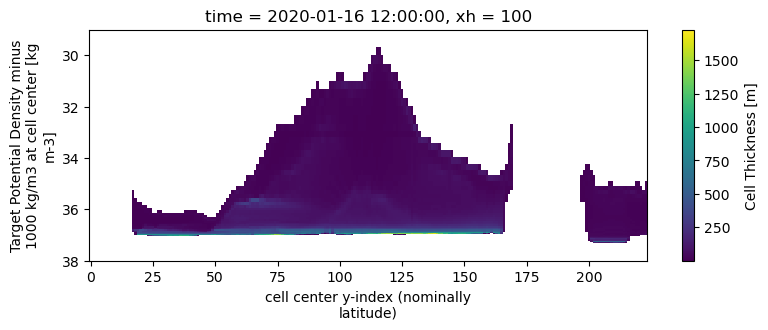

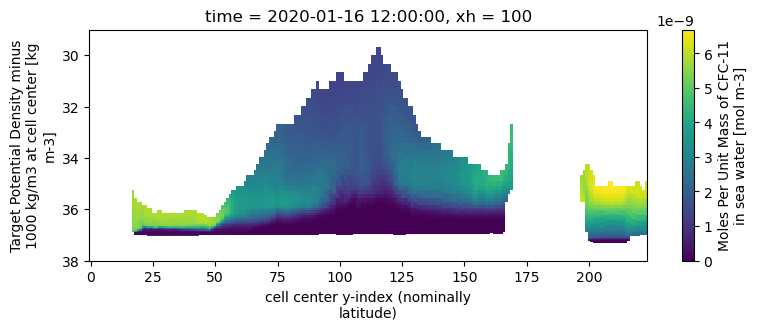

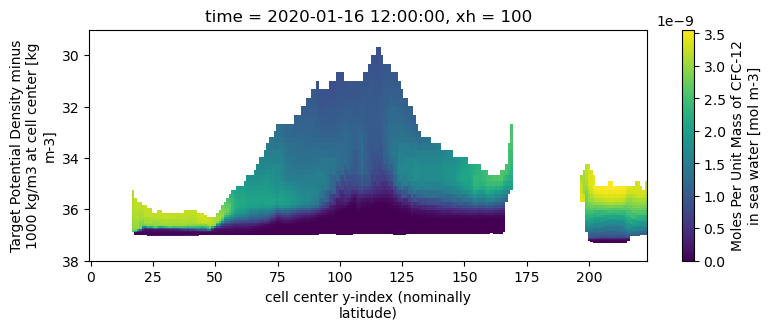

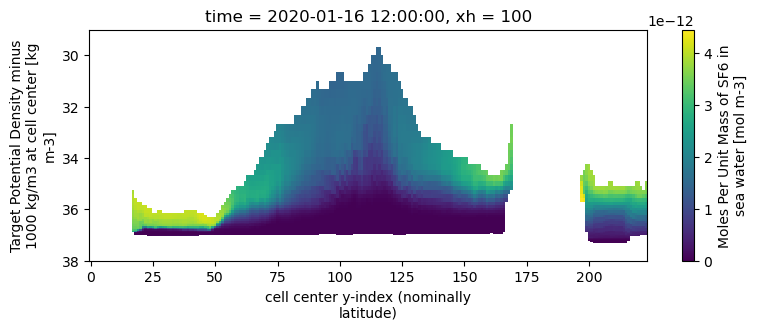

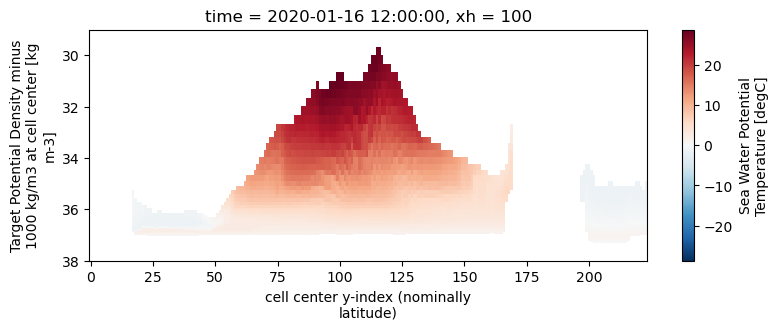

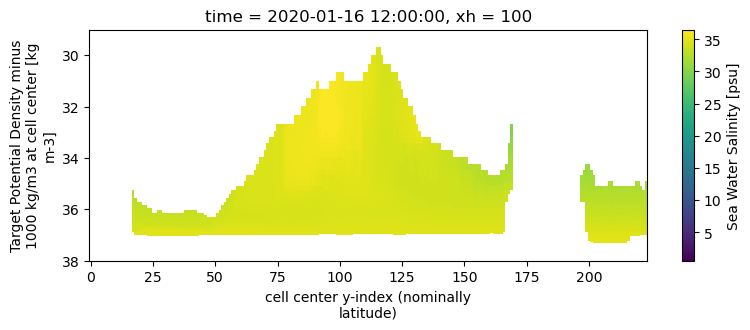

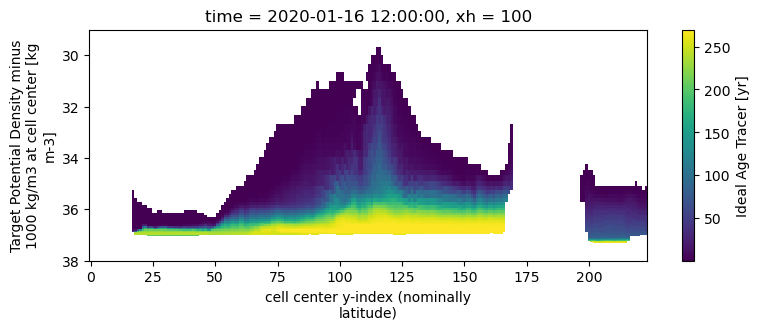

In [6]:
for v in ds.data_vars:
    plt.figure(figsize=(9,3))
    ds[v].isel(xh=100, time=0).plot()
    plt.ylim(38, 29)

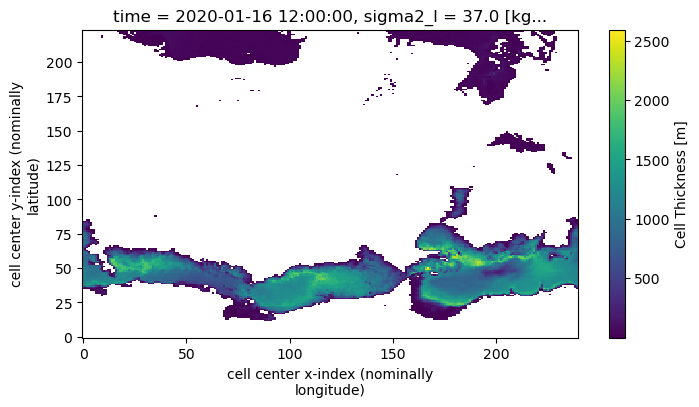

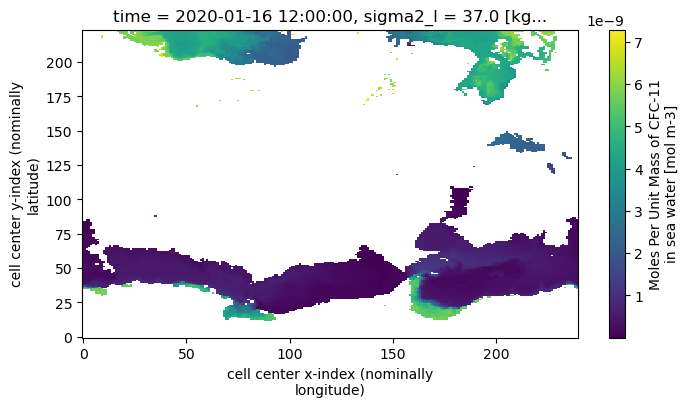

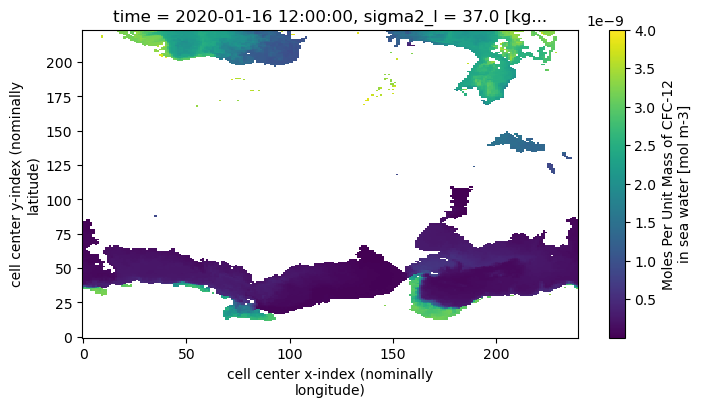

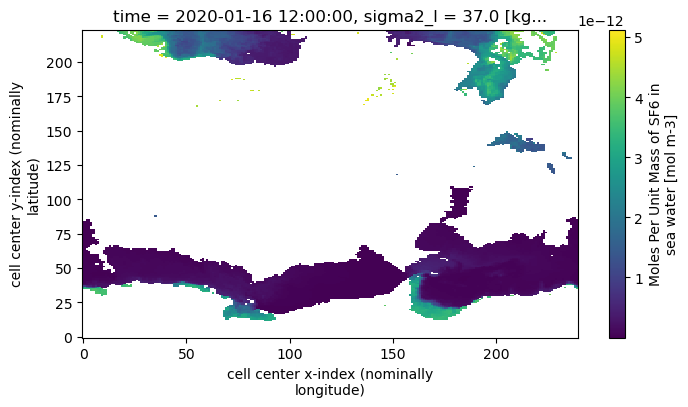

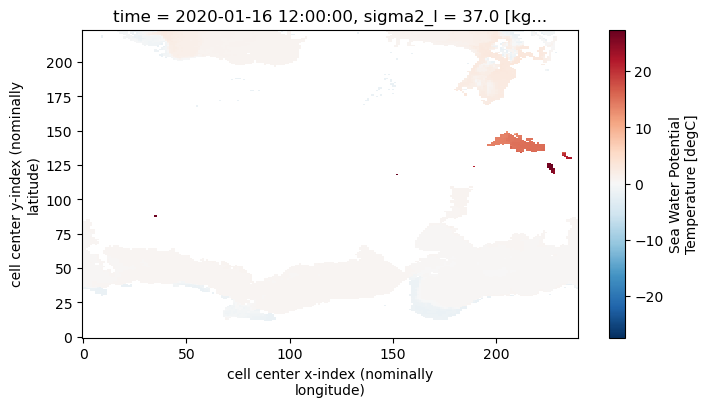

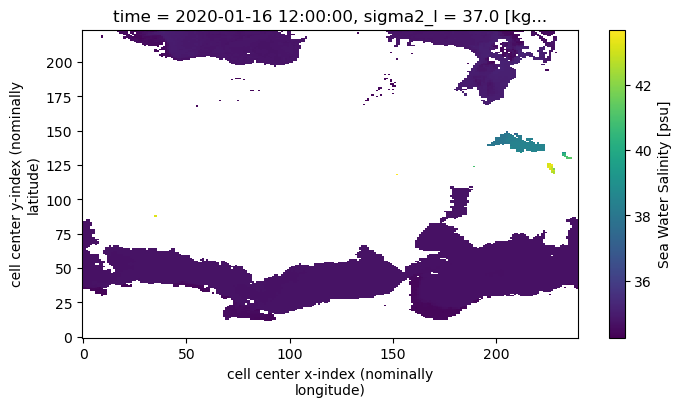

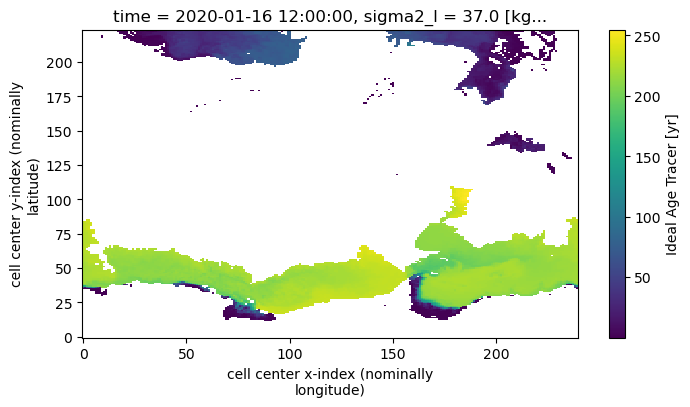

In [7]:
for v in ds.data_vars:
    plt.figure(figsize=(8,4))
    ds[v].sel(sigma2_l=37.0, method="nearest").isel(time=0).plot()